Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-27
Set parameter Heuristics to value 0.707
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: 13th Gen Intel(R) Core(TM) i7-13700F, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 669 rows, 309 columns and 2756 nonzeros
Model fingerprint: 0x07ac8d73
Variable types: 0 continuous, 309 integer (252 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+02]
Found heuristic solution: objective 241.0000000
Presolve removed 152 rows and 100 columns
Presolve time: 0.00s
Presolved: 517 rows, 209 columns, 2496 nonzeros
Variable types: 0 continuous, 209 integer (168 binary)
Found heuristic solution: objective 240.0000000

Root relaxation: objective 3.800000e+01, 83 iterations,

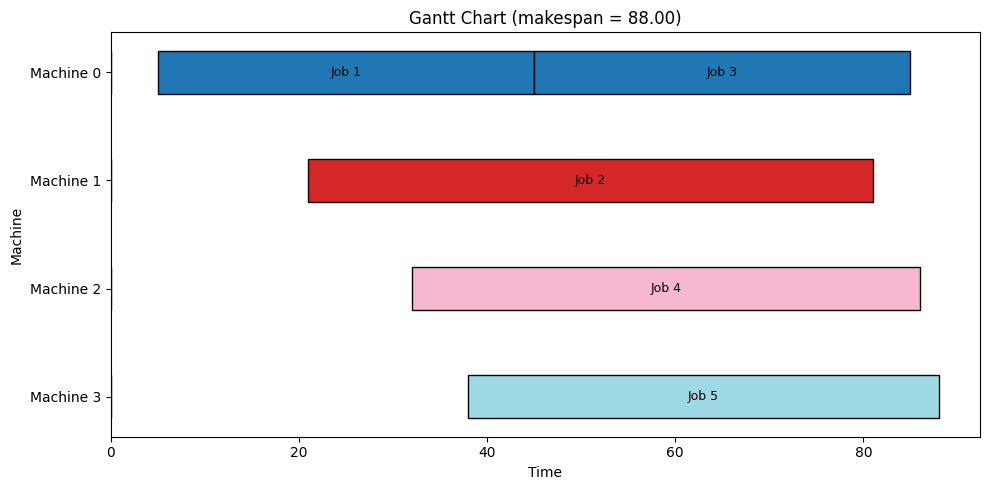

Optimal solution found with makespan: 88.0
Machine starting depots: [1 0 0 0]
Release times: [ 4 21 21 32 38]
Availability times: [5 3 1 9]
Job coordinates: [(np.int64(21), np.int64(10)), (np.int64(2), np.int64(19)), (np.int64(17), np.int64(14)), (np.int64(5), np.int64(15)), (np.int64(2), np.int64(14))]
Depot coordinates: [(np.int64(8), np.int64(0)), (np.int64(16), np.int64(0))]
Job costs: [([np.int64(56), np.int64(48)], [np.int64(48), np.int64(40)]), ([np.int64(60), np.int64(68)], [np.int64(68), np.int64(76)]), ([np.int64(56), np.int64(48)], [np.int64(48), np.int64(40)]), ([np.int64(46), np.int64(54)], [np.int64(54), np.int64(62)]), ([np.int64(50), np.int64(58)], [np.int64(58), np.int64(66)])]
Machine 0:
Job 1 at 5.0s in depot 1 -> Job 3 at 45.0s in depot 1
Job 3 at 45.0s in depot 1 -> Job 6 at 85.0s in depot 1

Machine 1:
Job 2 at 21.0s in depot 0 -> Job 6 at 81.0s in depot 0

Machine 2:
Job 4 at 32.0s in depot 0 -> Job 6 at 86.0s in depot 1

Machine 3:
Job 5 at 38.0s in depot 0 -> J

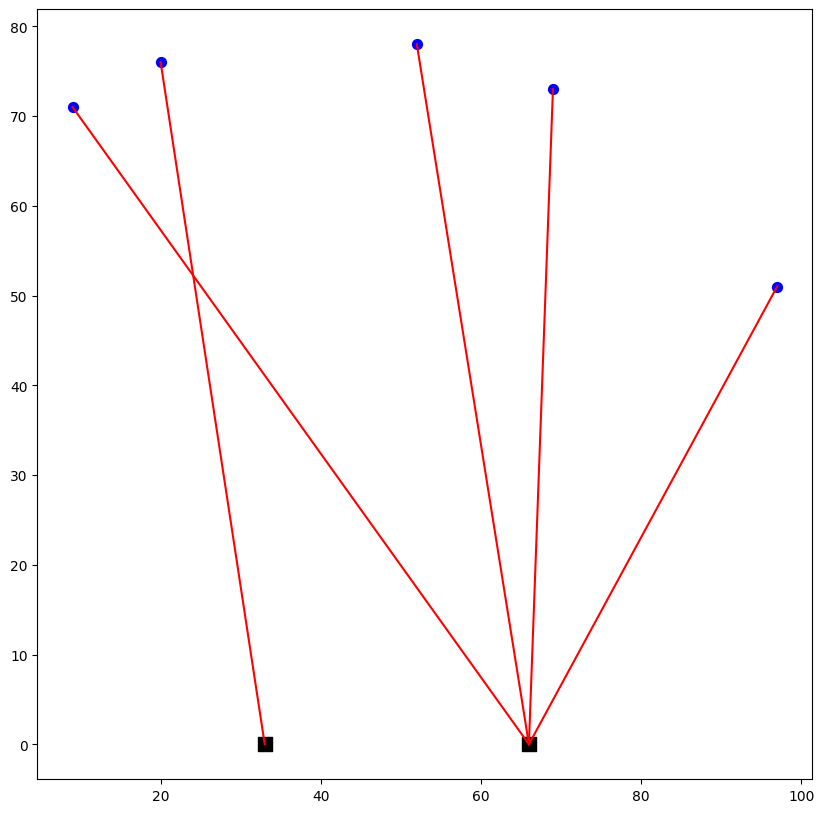

In [1]:
from multi_depot_demo import multi_depot_demo

multi_depot_demo(length=25, width=20, N=5, D=2, D0=[1,0,0,0], M_num=4, A0=[5,3,1,9], seed=42, print_sol=True, visualize=False, video=False)

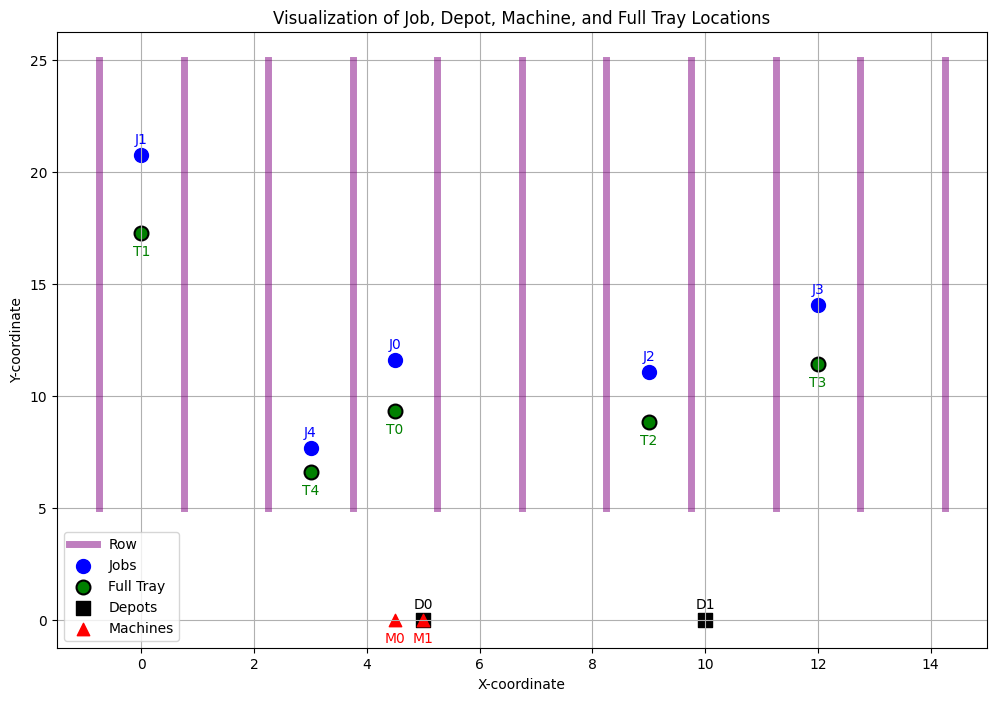

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
def randomize_settings(num_jobs, num_machines, num_depots, num_rows=10, row_width=1.5, row_length=25, seed=1, 
                       machine_available_range=20, job_release_range=20, headland_space=5, picker_speed=0.5):
    """
    Randomize settings for jobs, machines, and depots with unique rows for jobs.

    Parameters:
    - num_jobs: int, number of jobs.
    - num_machines: int, number of machines.
    - num_depots: int, number of depots.
    - num_rows: int, number of rows.
    - row_width: float, width of each row.
    - row_length: float, length of each row.
    - seed: int, random seed for reproducibility.
    - machine_available_range: int, range for machine availability times.
    - job_release_range: int, range for job release times.
    - headland_space: float, minimum vertical space for jobs.
    - picker_speed: float, speed of the picker.

    Returns:
    - job_locations: ndarray, shape (2, num_jobs), coordinates of jobs.
    - release_times: ndarray, release times for each job.
    - depots: ndarray, shape (2, num_depots), coordinates of depots.
    - machine_availables: ndarray, availability times for each machine.
    """
    # Random number generator
    rng = np.random.default_rng(seed)

    # Ensure unique rows for each job
    if num_jobs > num_rows:
        raise ValueError("Number of jobs cannot exceed the number of rows for unique row assignment.")
    job_row_ids = rng.choice(np.arange(num_rows), size=num_jobs, replace=False)

    # Generate release times for jobs
    release_times = rng.uniform(5, job_release_range, num_jobs)
    
    # Generate machine availability times
    machine_availables = rng.uniform(0, machine_available_range, num_machines)

    # X-coordinates of jobs (aligned with rows)
    job_xs = job_row_ids * row_width
    
    # Y-coordinates of jobs, ensuring constraints
    job_ys = rng.uniform(headland_space, row_length, num_jobs)
    min_y_constraints = release_times * picker_speed + headland_space
    job_ys = np.maximum(job_ys, min_y_constraints)
    
    # Job locations
    job_locations = np.array([job_xs, job_ys]).T
    
    # Depot locations
    width = row_width * num_rows
    depot_xs = np.linspace(width / (num_depots + 1), width * num_depots / (num_depots + 1), num_depots)
    depot_ys = np.zeros(num_depots)  # Depots are at y=0
    depots = np.array([depot_xs, depot_ys])

    # which depots the vehicles are in
    machine_depots = D0 = rng.integers(0, num_depots, num_machines)
     
    return job_locations, release_times, depots, machine_availables, machine_depots

def visualize_settings_with_full_tray_locations(job_locations, depots, release_times, machine_depots, picker_speed=0.5, 
                                                num_rows=10, row_width=1.5, row_length=25, headland_space=5):
    """
    Visualize the randomized settings with vertical rows, job locations, depots, machines, and full tray locations.
    
    Parameters:
    - job_locations: ndarray, shape (num_jobs, 2), coordinates of jobs.
    - depots: ndarray, shape (2, num_depots), coordinates of depots.
    - release_times: ndarray, release times for each job.
    - machine_depots: ndarray, depot indices where machines are located.
    - picker_speed: float, speed of the picker.
    - num_rows: int, number of rows in the setting.
    - row_width: float, width of each row.
    - row_length: float, length of each row.
    - headland_space: float, vertical space at the bottom of rows.
    """
    plt.figure(figsize=(12, 8))
    
    # Plot rows as thick vertical lines
    for row_id in range(num_rows + 1):
        row_x_start = row_id * row_width - row_width / 2
        plt.plot([row_x_start, row_x_start], [headland_space, row_length], color='purple', linewidth=5, alpha=0.5, label='Row' if row_id == 0 else None)
    
    # Plot jobs and label job IDs
    for idx, (x, y) in enumerate(zip(job_locations[:,0], job_locations[:,1])):
        plt.scatter(x, y, color='blue', s=100, label='Jobs' if idx == 0 else None, marker='o')
        plt.text(x, y + 0.5, f"J{idx}", fontsize=10, color='blue', ha='center')  # Label above
    
    # Calculate and plot full tray locations (green circles with golden cross)
    full_tray_ys = job_locations[:,1] - picker_speed * release_times
    for idx, (x, y) in enumerate(zip(job_locations[:,0], full_tray_ys)):
        plt.scatter(x, y, color='green', s=100, label='Full Tray' if idx == 0 else None, marker='o', edgecolors='black', linewidths=1.5)
        plt.text(x, y - 1, f"T{idx}", fontsize=10, color='green', ha='center')  # Label below

    
    # Plot depots and label depot IDs
    for idx, (x, y) in enumerate(zip(depots[0], depots[1])):
        plt.scatter(x, y, color='black', s=100, label='Depots' if idx == 0 else None, marker='s')
        plt.text(x, y + 0.5, f"D{idx}", fontsize=10, color='black', ha='center')  # Label below
    
    # Plot machines near depots (horizontally aligned, with labels below)
    for idx, depot_idx in enumerate(machine_depots):
        depot_x = depots[0][depot_idx]
        depot_y = depots[1][depot_idx]
        machine_x = depot_x + (idx - 1) * 0.5  # Slight horizontal offset
        plt.scatter(machine_x, depot_y, color='red', s=80, label='Machines' if idx == 0 else None, marker='^')
        plt.text(machine_x, depot_y - 1.0, f"M{idx}", fontsize=10, color='red', ha='center')  # Label below
    
    # Formatting
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.title("Visualization of Job, Depot, Machine, and Full Tray Locations")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
num_jobs = 5
num_machines = 2
num_depots = 2
num_rows = 10
picker_speed = 0.2
# Randomize settings
job_locations, release_times, depots, machine_availables, machine_depots = randomize_settings(
    num_jobs, num_machines, num_depots, num_rows=num_rows, row_width=1.5, row_length=25, headland_space=5, picker_speed=picker_speed
)

# Visualize settings
visualize_settings_with_full_tray_locations(job_locations, depots, release_times, machine_depots, picker_speed=picker_speed, 
                                            num_rows=num_rows, row_width=1.5, row_length=25, headland_space=5)


In [93]:
def plot_gantt(model, E, v, s, P, machines, jobs, depots, N, T_var):
    """
    model   : your gurobipy model (for checking status, if needed)
    E       : E[i,j,k] variables -> job i immediately followed by j on machine k
    v       : v[i,k,d] variables -> job i on machine k departing from depot d
    s       : s[i,k,d] variables -> start time of job i on machine k from depot d
    P       : P[i,d_in,d_out] -> travel/load/unload time from i in d_in to next job i in d_out
    machines: list of machine indices
    jobs    : list of job indices (0 = dummy start, N+1 = dummy end)
    depots  : list of depot indices
    N       : number of real jobs
    T_var   : the gurobi var for the makespan (T)
    """

    # Only proceed if model has a feasible (or optimal) solution:
    if model.SolCount == 0:
        print("No feasible solution found; cannot plot Gantt chart.")
        return

    fig, ax = plt.subplots(figsize=(10, 5))

    # Distinguish real jobs from dummy jobs:
    dummy_start = 0
    dummy_end = N+1

    # We'll just color-code each machine differently.
    color_map = plt.cm.get_cmap("tab20", len(machines))

    # On the Gantt chart, the y-axis will be the machine index
    # and the x-axis will represent time.
    for k_idx, k in enumerate(machines):
        machine_color = color_map(k_idx)
        
        # Start from the dummy start job (0) and follow the chain until dummy end (N+1)
        current_job = dummy_start
        
        while current_job != dummy_end:
            # Find the next job j where E[current_job, j, k] = 1
            next_job = None
            for j in jobs:
                if j != current_job and E[current_job, j, k].X > 0.5:
                    next_job = j
                    break
            
            if next_job is None:
                # Means we didn't find a successor for current_job on machine k
                # Possibly something incomplete or dummy_end is next.
                break

            # Find which depot d_in was chosen for current_job,
            # and which depot d_out is chosen for next_job.
            chosen_d_in = None
            chosen_d_out = None
            for d in depots:
                if v[current_job, k, d].X > 0.5:
                    chosen_d_in = d
                    break
            for d in depots:
                if v[next_job, k, d].X > 0.5:
                    chosen_d_out = d
                    break

            # If the current job is not the dummy end, we can plot the bar for it
            if current_job != dummy_end:
                start_time = s[current_job, k, chosen_d_in].X
                # The time from current_job to next_job is stored in P[current_job, d_in, d_out]
                finish_time = start_time + P[current_job, chosen_d_in, chosen_d_out]

                # Draw a bar on the Gantt chart from (start_time) to (finish_time)
                ax.barh(
                    y=k_idx,               # the "machine row" on the chart
                    width=finish_time - start_time,
                    left=start_time,
                    height=0.4,
                    align='center',
                    color=machine_color,
                    edgecolor='black'
                )

                # Optionally label the bar with the job index (skip if it's a dummy)
                if current_job not in [dummy_start, dummy_end]:
                    ax.text(
                        (start_time + finish_time) / 2.0,
                        k_idx,
                        f"Job {current_job}",
                        ha='center',
                        va='center',
                        color='black',
                        fontsize=9
                    )

            # Move on
            current_job = next_job

    # Some final cosmetics:
    ax.set_yticks(range(len(machines)))
    ax.set_yticklabels([f"Machine {k}" for k in machines])
    ax.invert_yaxis()   # so machine 0 is at the top, if you prefer
    ax.set_xlabel("Time")
    ax.set_ylabel("Machine")
    # If T_var is the makespan variable, you can show it in the title:
    ax.set_title(f"Gantt Chart (makespan = {T_var.X:.2f})")

    plt.tight_layout()
    plt.show()

Set parameter Heuristics to value 0.707
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: 13th Gen Intel(R) Core(TM) i7-13700F, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 337 rows, 155 columns and 1378 nonzeros
Model fingerprint: 0x8c460442
Variable types: 0 continuous, 155 integer (126 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+05]
Found heuristic solution: objective 286.0000000
Presolve removed 76 rows and 50 columns
Presolve time: 0.00s
Presolved: 261 rows, 105 columns, 1248 nonzeros
Variable types: 0 continuous, 105 integer (84 binary)
Found heuristic solution: objective 285.0000000

Root relaxation: objective 1.700000e+01, 59 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds     

     0     2   17.00000    0    6   85.00000   17.00000  80.0%     -    0s
H   31    50                      83.0000000   17.00000  79.5%   4.8    0s
H  103    95                      77.0000000   17.00000  77.9%   4.7    0s
H  216   135                      76.0000000   17.00000  77.6%   4.3    0s

Cutting planes:
  Learned: 30
  Gomory: 1
  Inf proof: 6

Explored 5931 nodes (15196 simplex iterations) in 0.59 seconds (0.34 work units)
Thread count was 24 (of 24 available processors)

Solution count 10: 76 77 83 ... 115

Optimal solution found (tolerance 1.00e-04)
Best objective 7.600000000000e+01, best bound 7.600000000000e+01, gap 0.0000%


/tmp/ipykernel_13038/394077127.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", len(machines))


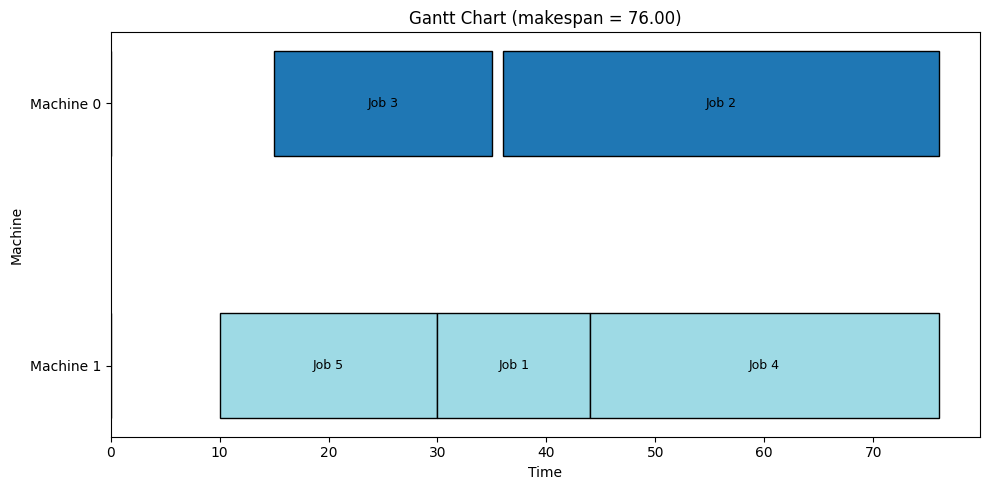

In [96]:
import gurobipy as gp
from gurobipy import GRB

def solve_scheduling_model(job_locations, release_times, depot_locations, 
                           machine_availables, machine_depots, gantt_plot=True):
    # Rt = np.sort(Rt)
    # Rt = np.insert(Rt, 0, 0)  # start job
    # Rt = np.append(Rt, 0)  # end job

    depot_num = len(depot_locations)
    job_num = len(job_locations)
    machine_num = len(machine_availables)

    loading_duration = 5  # loading duration for each job
    unloading_duration = 5  # unloading duration for each job
    
    # list for the modeling
    jobs = list(range(job_num+2))  # 0 for start, N+1 for end, 1..N are real jobs
    depots = list(range(depot_num))  # depots indexed from 0 to D-1
    machines = list(range(machine_num))
    job_locations = np.vstack(([0, 0], job_locations, [50, 50]))
    release_times = np.insert(release_times, 0, 0)  # start job
    release_times = np.append(release_times, 0)  # end job
    process_times = np.zeros((len(job_locations), depot_num, depot_num))  # Initialize the array with zeros
    
    A_k = machine_availables.astype(int)
    Rt = release_times.astype(int)
    job_locations = job_locations.astype(int)
    
    D0 = machine_depots
    
    for i in jobs:
        for d1 in depots:
            for d2 in depots:
                if i != 0 and i != job_num + 1:
                    process_times[i][d1][d2] = (
                        abs(job_locations[i][0] - depot_locations[d1][0]) + 
                        abs(job_locations[i][1] - depot_locations[d1][1]) + 
                        loading_duration + 
                        abs(job_locations[i][0] - depot_locations[d2][0]) + 
                        abs(job_locations[i][1] - depot_locations[d2][1]) + 
                        unloading_duration
                    )
                else:
                    process_times[i][d1][d2] = 0
    process_times = process_times.astype(int)
    # print(process_times)
    BigM = 100000  # large M
    model = gp.Model("Strawberry_Pickup")

    # Decision variables
    # v[i,k,d] = 1 if machine k executes job i departing from depot d (for real jobs and also for i=0 or i=N+1)
    v = model.addVars(jobs, machines, depots, vtype=GRB.BINARY, name="v")

    # E[i,j,k] = 1 if machine k executes job i immediately followed by job j
    E = model.addVars(jobs, jobs, machines, vtype=GRB.BINARY, name="E")

    # s[i,k,d]: start time of job i on machine k if departing from depot d
    s = model.addVars(jobs, machines, depots, vtype=GRB.INTEGER, name="s", lb=0.0)

    # Objective: Minimize the maximum completion time
    # Completion time of job i on machine k from depot d is s[i,k,d] + P[i,d,d'] (depending on next job/depot).
    # To handle min max, introduce a variable T representing the makespan and minimize T.
    T = model.addVar(vtype=GRB.INTEGER, name="makespan", lb=0.0)

    model.setObjective(T, GRB.MINIMIZE)

    # Constraints

    # 0) No self loop
    model.addConstrs((E[i,i,k] == 0 for i in jobs for k in machines), name="no_self_loop")

    # 1) Each real job i (1..N) must be done exactly once
    model.addConstrs((gp.quicksum(v[i,k,d] for k in machines for d in depots) == 1 for i in jobs[1:-1]), name=f"job_once_constraints")

    # 2) Each machine starts from D0[k] depot
    model.addConstrs((v[i,k,D0[k]] >= E[0,i,k] for k in machines for i in jobs[1:]), f"start_job_constraints")

    # 3) Each machine starts and ends exactly once at a depot at job 0 and job N+1
    for k in machines:
        # Dummy start jobs. Machine k starts from depot D0[k]
        model.addConstr(v[0,k,D0[k]] == 1, name=f"start_{k}_1")
        model.addConstrs((v[0,k,d] == 0 for d in depots if d != D0[k]), name=f"start_{k}_2")
        # Dummy end jobs
        model.addConstr(gp.quicksum(v[job_num+1,k,d] for d in depots) == 1, name=f"end_{k}")

    # 4) Connectivity constraints:
    # For each machine k and each job i (except end job):
    # Outflow = inflow in terms of E
    for k in machines:
        for i in jobs:
            outflow = gp.quicksum(E[i,j,k] for j in jobs if j != i)
            inflow = gp.quicksum(E[h,i,k] for h in jobs if h != i)
            # If i is start job (0): outflow = v[0,k,d], inflow=0
            # If i is end job (N+1): inflow = v[N+1,k,d], outflow=0
            # If i is a real job: inflow = v[i,k,d], outflow = v[i,k,d]
            
            if i == 0:
                # Start job: outflow = sum_d v[0,k,d], inflow = 0
                model.addConstr(outflow == gp.quicksum(v[0,k,d] for d in depots), f"flow_start_{k}")
                model.addConstr(inflow == 0, f"flow_start_{k}_in")
            elif i == num_jobs+1:
                # End job: inflow = sum_d v[N+1,k,d], outflow=0
                model.addConstr(inflow == gp.quicksum(v[job_num+1,k,d] for d in depots), f"flow_end_{k}")
                model.addConstr(outflow == 0, f"flow_end_{k}_out")
            else:
                # Real job: inflow = outflow = sum_d v[i,k,d]
                model.addConstr(outflow == gp.quicksum(v[i,k,d] for d in depots), f"outflow_job_{i}_{k}")
                model.addConstr(inflow == gp.quicksum(v[i,k,d] for d in depots), f"inflow_job_{i}_{k}")

    # 5) Timeline constraints:
    # For any pair (i,j) such that E[i,j,k] = 1, we must have:
    # s[j,k,d'] >= s[i,k,d] + P[i,d,d'] - BigM*(1 - E[i,j,k])
    # We need to know which depot is associated with job i and j under machine k
    # This is tricky because v[i,k,d]=1 chooses the depot d for job i.
    # We can enforce this by summation over d and d':
    #   s[j,k,d'] >= s[i,k,d] + P[i,d,d'] - BigM(1 - E[i,j,k])
    # and also link that if v[i,k,d]=1 and v[j,k,d']=1 then these must hold.
    #
    # One way is to enforce for all d,d':
    # s[j,k,d'] >= s[i,k,d] + P[i,d,d'] - BigM*(1 - E[i,j,k]) - BigM*(1 - v[i,k,d]) - BigM*(1 - v[j,k,d'])
    # This is a big constraint. Alternatively, you can linearize depot choice more cleverly.
    #
    # For simplicity, assume you know P[i,d,d'] and apply constraints for all d,d' with big-M:
    for k in machines:
        for i in jobs[1:-1]:
            for j in jobs[1:]:
                if i != j:
                    for d_in in depots:
                        for d_out in depots:
                            model.addConstr(s[j,k,d_out] 
                                            >= s[i,k,d_in] + process_times[i,d_in,d_out]
                                            - BigM*(1 - E[i,j,k]) 
                                            - BigM*(1 - v[i,k,d_in])
                                            - BigM*(1 - v[j,k,d_out]),
                                            name=f"time_seq_{i}_{j}_{k}_{d_in}_{d_out}")

    # 6) Availability constraints:
    # s[i,k,d] >= A_k + t_i * v[i,k,d]
    for k in machines:
        for i in jobs[1:]:
            for d in depots:
                model.addConstr(s[i,k,d] >= A_k[k], f"avail_{i}_{k}_{d}")
                model.addConstr(s[i,k,d] >= Rt[i], f"release_{i}_{k}_{d}")

    # 7) Objective linking:
    # T >= s[i,k,d] + P[i,d,d'] * v[i,k,d] for all i,k,d,d'
    for k in machines:
        for i in jobs[1:]:
            for d in depots:
                model.addConstr(T >= s[i,k,d], f"makespan_{i}_{k}_{d}")

    # Tuning gurobi parameters
    model.Params.Heuristics = 0.707 # Set the heuristic parameter to 0.707
    # model.Params.MIPFocus = 2 # Set the MIP focus to 2 for more aggressive cut
    # model.Params.NoRelHeurTime = 60 # Set the time limit for heuristic to 100 seconds
    #model.Params.NoRelHeurWork = 1e12 # Set the work limit for heuristic to 1e6 iterations
       # Solve
    model.optimize()
    if gantt_plot:
    # --- Now call the Gantt chart function ---
        plot_gantt(
            model=model,
            E=E,
            v=v,
            s=s,
            P=process_times,
            machines=machines,
            jobs=jobs,
            depots=depots,
            N=num_jobs,
            T_var=T
        )
        
    return model

model = solve_scheduling_model(job_locations, release_times, depots, 
                               machine_availables, machine_depots, gantt_plot=True)
plt.show()


In [ ]:
if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT or model.status == GRB.INTERRUPTED:
    print("Optimal solution found with makespan:", T.X)
    ...
    # (Your existing printing of routes, etc.)

    # --- Now call the Gantt chart function ---
    plot_gantt(
        model=model,
        E=model.E,
        v=model.v,
        s=model.s,
        P=process_times,
        machines=machines,
        jobs=jobs,
        depots=depots,
        N=N,
        T_var=T
    )

In [2]:
from multi_depot_demo import multi_depot_demo

multi_depot_demo(length=50, width=50, N=10, D=2, D0=[1,0], M_num=2, A0=[5,3], seed=42, print_sol=True, visualize=False, video=False)

Set parameter Heuristics to value 0.707
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: AMD Ryzen 9 7950X 16-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 16 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 1042 rows, 385 columns and 4908 nonzeros
Model fingerprint: 0xa412deaa
Variable types: 0 continuous, 385 integer (336 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
Presolve removed 126 rows and 80 columns
Presolve time: 0.00s
Presolved: 916 rows, 305 columns, 4688 nonzeros
Variable types: 0 continuous, 305 integer (264 binary)

Root relaxation: objective 8.500000e+01, 147 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

In [61]:
def plot_gantt(model, E, v, s, P, machines, jobs, depots, N, T_var):
    """
    model   : your gurobipy model (for checking status, if needed)
    E       : E[i,j,k] variables -> job i immediately followed by j on machine k
    v       : v[i,k,d] variables -> job i on machine k departing from depot d
    s       : s[i,k,d] variables -> start time of job i on machine k from depot d
    P       : P[i,d_in,d_out] -> travel/load/unload time from i in d_in to next job i in d_out
    machines: list of machine indices
    jobs    : list of job indices (0 = dummy start, N+1 = dummy end)
    depots  : list of depot indices
    N       : number of real jobs
    T_var   : the gurobi var for the makespan (T)
    """

    # Only proceed if model has a feasible (or optimal) solution:
    if model.SolCount == 0:
        print("No feasible solution found; cannot plot Gantt chart.")
        return

    fig, ax = plt.subplots(figsize=(10, 5))

    # Distinguish real jobs from dummy jobs:
    dummy_start = 0
    dummy_end = N+1

    # We'll just color-code each machine differently.
    color_map = plt.cm.get_cmap("tab20", len(machines))

    # On the Gantt chart, the y-axis will be the machine index
    # and the x-axis will represent time.
    for k_idx, k in enumerate(machines):
        machine_color = color_map(k_idx)
        
        # Start from the dummy start job (0) and follow the chain until dummy end (N+1)
        current_job = dummy_start
        
        while current_job != dummy_end:
            # Find the next job j where E[current_job, j, k] = 1
            next_job = None
            for j in jobs:
                if j != current_job and E[current_job, j, k].X > 0.5:
                    next_job = j
                    break
            
            if next_job is None:
                # Means we didn't find a successor for current_job on machine k
                # Possibly something incomplete or dummy_end is next.
                break

            # Find which depot d_in was chosen for current_job,
            # and which depot d_out is chosen for next_job.
            chosen_d_in = None
            chosen_d_out = None
            for d in depots:
                if v[current_job, k, d].X > 0.5:
                    chosen_d_in = d
                    break
            for d in depots:
                if v[next_job, k, d].X > 0.5:
                    chosen_d_out = d
                    break

            # If the current job is not the dummy end, we can plot the bar for it
            if current_job != dummy_end:
                start_time = s[current_job, k, chosen_d_in].X
                # The time from current_job to next_job is stored in P[current_job, d_in, d_out]
                finish_time = start_time + P[current_job, chosen_d_in, chosen_d_out]

                # Draw a bar on the Gantt chart from (start_time) to (finish_time)
                ax.barh(
                    y=k_idx,               # the "machine row" on the chart
                    width=finish_time - start_time,
                    left=start_time,
                    height=0.4,
                    align='center',
                    color=machine_color,
                    edgecolor='black'
                )

                # Optionally label the bar with the job index (skip if it's a dummy)
                if current_job not in [dummy_start, dummy_end]:
                    ax.text(
                        (start_time + finish_time) / 2.0,
                        k_idx,
                        f"Job {current_job}",
                        ha='center',
                        va='center',
                        color='black',
                        fontsize=9
                    )

            # Move on
            current_job = next_job

    # Some final cosmetics:
    ax.set_yticks(range(len(machines)))
    ax.set_yticklabels([f"Machine {k}" for k in machines])
    ax.invert_yaxis()   # so machine 0 is at the top, if you prefer
    ax.set_xlabel("Time")
    ax.set_ylabel("Machine")
    # If T_var is the makespan variable, you can show it in the title:
    ax.set_title(f"Gantt Chart (makespan = {T_var.X:.2f})")

    plt.tight_layout()
    plt.show()

In [ ]:
if model.status == GRB.OPTIMAL or model.status == GRB.TIME_LIMIT or model.status == GRB.INTERRUPTED:
    print("Optimal solution found with makespan:", T.X)
    # (Your existing printing of routes, etc.)

    # --- Now call the Gantt chart function ---
    plot_gantt(
        model=model,
        E=model.E,
        v=model.v,
        s=model.s,
        P=model.P,
        machines=machines,
        jobs=jobs,
        depots=depots,
        N=N,
        T_var=T
    )

In [3]:
from multi_depot_demo import multi_depot_demo

multi_depot_demo(length=50, width=50, N=10, D=1, D0=[0,0,0,0], M_num=4, A0=[5,3,1,9], seed=42, print_sol=True, visualize=False, video=False)

Set parameter Heuristics to value 0.707
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: AMD Ryzen 9 7950X 16-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 16 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 738 rows, 673 columns and 3504 nonzeros
Model fingerprint: 0x592fc8db
Variable types: 0 continuous, 673 integer (624 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+03]
Presolve removed 200 rows and 148 columns
Presolve time: 0.00s
Presolved: 538 rows, 525 columns, 3048 nonzeros
Variable types: 0 continuous, 525 integer (484 binary)

Root relaxation: objective 8.500000e+01, 162 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti